# Assignment 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv(r'C:\Users\acer\Desktop\WA_Fn-UseC_-HR-Employee-Attrition.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [5]:
df.head(5)
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   str  
 2   BusinessTravel            1470 non-null   str  
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   str  
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   str  
 8   EmployeeCount             1470 non-null   int64
 9   EmployeeNumber            1470 non-null   int64
 10  EnvironmentSatisfaction   1470 non-null   int64
 11  Gender                    1470 non-null   str  
 12  HourlyRate                1470 non-null   int64
 13  JobInvolvement            1470 non-null   int64
 14  JobLevel                  1470 non-null   int64
 15

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder

In [7]:
le =LabelEncoder()
df['Attrition_Encoded'] = le.fit_transform(df['Attrition']) # Yes =1,no =0
df['OverTime_Encoded'] =le.fit_transform(df['OverTime'])

In [8]:
features = [
    'Age', 
    'DistanceFromHome', 
    'EnvironmentSatisfaction', 
    'JobSatisfaction', 
    'JobLevel', 
    'MonthlyIncome', 
    'OverTime_Encoded', 
    'TotalWorkingYears'
]

X =df[features]
y =df['Attrition_Encoded']

In [9]:
X_train, X_test, y_train,y_test =train_test_split(X,y, test_size=0.2,random_state=42)
model = LinearRegression()
model.fit(X_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [10]:
y_pred =model.predict(X_test)

In [11]:
print(f"Model Score:{model.score(X_test ,y_test)}")

Model Score:0.05543821602687826


In [12]:
importance =pd.DataFrame({'Feature':features,'Coefficient':model.coef_})
importance = importance.sort_values(by ='Coefficient',ascending=False)

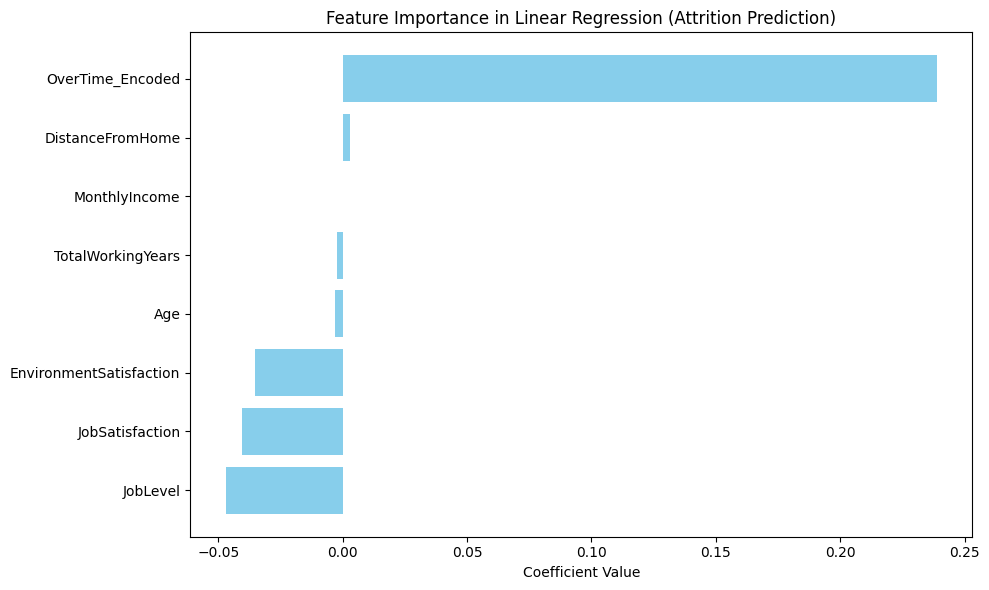

In [13]:
plt.figure(figsize=(10,6))
plt.barh(importance['Feature'],importance['Coefficient'],color ='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Linear Regression (Attrition Prediction)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('feature_importance.png')

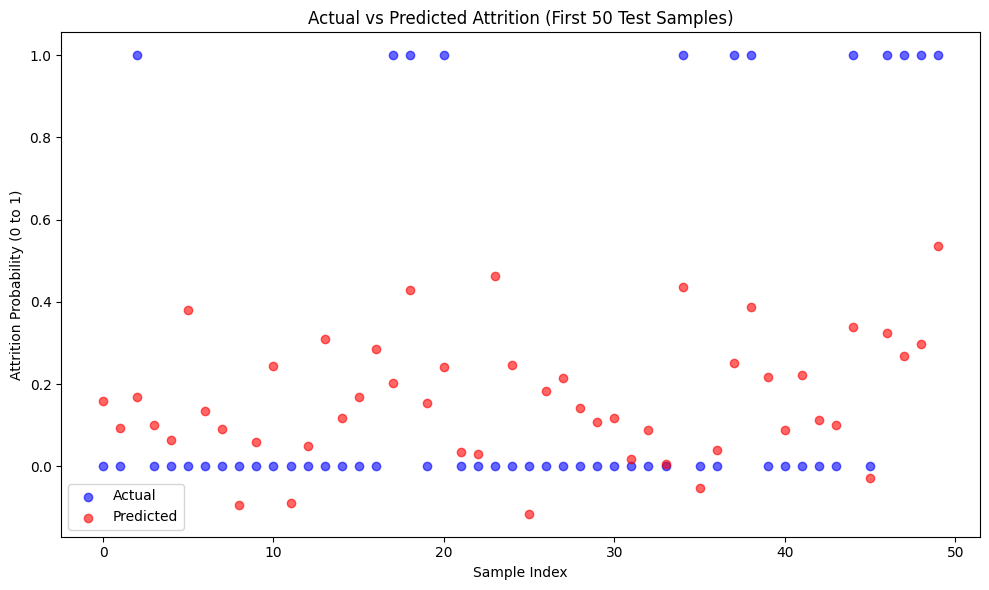

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(range(50), y_test[:50], color='blue', label='Actual', alpha=0.6)
plt.scatter(range(50), y_pred[:50], color='red', label='Predicted', alpha=0.6)
plt.title('Actual vs Predicted Attrition (First 50 Test Samples)')
plt.xlabel('Sample Index')
plt.ylabel('Attrition Probability (0 to 1)')
plt.legend()
plt.tight_layout()
plt.savefig('actual_vs_predicted.png')

In [15]:
output_df = X_test.copy()
output_df['Actual_Attrition'] = y_test
output_df['Predicted_Attrition'] = y_pred
output_df.to_csv('attrition_predictions.csv', index=False)
print("Model training and evaluation complete. Results saved to attrition_predictions.csv.")

Model training and evaluation complete. Results saved to attrition_predictions.csv.
